## You are hired by City of Houston to analyze presence of E.coli bacteria in the city’s waterways. 

You are asked to preform data analysis to accomplish three specific goals: 

1.	Compute average amount of E.coli per year in Houston waterways. Plot a bar graph in which x-axis is years (2013-2016) and y-axis is E.coli amount. [25 points] 
2.	Compute average amount of E.coli per month in Houston waterways. Plot a bar graph in which x-axis is months (Jan-Dec) and y-axis is E.coli amount. Each month is aggregated over the years. [25 points]
3.	Show correlations between E.coli and chemical factors such as water PH level, dissolved oxygen, specific conductance, etc. [50 points]

In [62]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import data set
df=pd.read_excel('Ecoli Data.xlsx')
print(df.shape)
print(df.columns)
df.head()

(3565, 34)
Index(['Sample ID', 'Station ID', 'Date Collected', 'Water Temp',
       'Flow Stream', 'Transparency', 'Specific Conductance',
       'Dissolved Oxygen', 'PH', 'Salinity', 'Residue', 'Ammonia Nitrogen',
       'Nitrate Nitrogen', 'Nitrogen', 'Phosphorous', 'Chloride', 'Sulfate',
       'Flow Severity', 'E.coli', 'Entercocci', 'E.coli Holding Time',
       'Days Since Precipitation', 'Water Depth', 'Water Flow',
       'Wind Intensity', 'Present Weather', 'Water Surface', 'Water Color',
       'Water Odor', 'Tide', 'Primary Contact', 'Evidence of Recreation',
       'Sample Depth', 'Field Temp'],
      dtype='object')


,Sample ID,Station ID,Date Collected,Water Temp,Flow Stream,Transparency,Specific Conductance,Dissolved Oxygen,PH,Salinity,...,Wind Intensity,Present Weather,Water Surface,Water Color,Water Odor,Tide,Primary Contact,Evidence of Recreation,Sample Depth,Field Temp
0,1,1,2013-10-02,26.7,NaN,0.30,341.0,4.2,7.6,NaN,...,2.0,4.0,2.0,3.0,6.0,NaN,0.0,0.0,0.09,NaN
1,2,1,2013-11-26,9.3,NaN,0.19,228.0,10.2,7.6,NaN,...,3.0,3.0,2.0,3.0,6.0,NaN,0.0,0.0,0.27,NaN
2,3,1,2014-01-30,8.2,NaN,0.85,692.0,15.1,8.2,NaN,...,2.0,3.0,2.0,3.0,6.0,NaN,0.0,0.0,0.12,NaN
3,4,1,2014-02-25,18.9,NaN,0.14,710.0,7.0,7.7,NaN,...,2.0,3.0,2.0,3.0,6.0,NaN,0.0,0.0,0.09,NaN
4,5,1,2014-03-24,16.3,NaN,1.20,734.0,9.3,7.9,NaN,...,2.0,3.0,2.0,1.0,6.0,NaN,0.0,0.0,0.06,NaN


### 1. Compute average amount of E.coli per year in Houston waterways. 

Plot a bar graph in which x-axis is years (2013-2016) and y-axis is E.coli amount. [25 points]

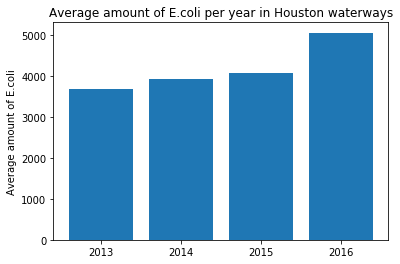

In [15]:
df['Date Collected']=pd.to_datetime(df['Date Collected']) # convert date collected to datetime object
sbs_df=df['E.coli']
df['Year']=[x.year for x in df['Date Collected']]
df['Month']=[x.month for x in df['Date Collected']]
df['Day']=[x.day for x in df['Date Collected']]
year_list=df['Year'].unique()
aepy=[] # Average amount of E.coli Per Year
for i in range(2013,2017):
    ecoli_py=df['E.coli'][df['Year']==i]
    aepy.append(ecoli_py.mean())
plt.bar(year_list,aepy)
plt.xticks(year_list)
plt.ylabel('Average amount of E.coli')
plt.title('Average amount of E.coli per year in Houston waterways')

plt.show()

## 2. Compute average amount of E.coli per month in Houston waterways. 

Plot a bar graph in which x-axis is months (Jan-Dec) and y-axis is E.coli amount. Each month is aggregated over the years. [25 points]


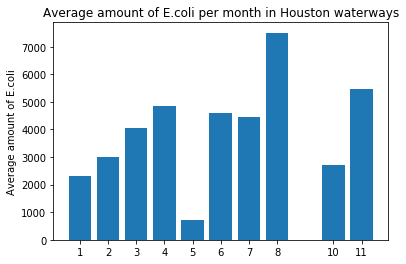

In [17]:
month_list=df['Month'].unique()
aepm=[] # Average amount of E.coli Per Month
for i in month_list:
    ecoli_pm=df['E.coli'][df['Month']==i]
    aepm.append(ecoli_pm.mean())
plt.bar(month_list,aepm)
plt.xticks(month_list)
plt.ylabel('Average amount of E.coli')
plt.title('Average amount of E.coli per month in Houston waterways')

plt.show()

In [55]:
feature_list=df.columns
for feat in feature_list:
    if df[feat].isnull().any():
        noma=df[feat].isnull().value_counts()
        noma=noma[1]
        mp=round(noma/35.65,4) # Missing values percentage
        print(feat +" : " + str(noma) + " → Percentage = " + str(mp))
        #Drop all feature that have percentage of missing values larger than 80%
        if mp>80: df.drop(columns=[feat],inplace=True)
        #Fillna by mean for features that have percentage of missing values smaller than 2%
        if mp<2 : df[feat].fillna(df[feat].mean(),inplace=True)
print(df.shape)
df['E.coli Holding Time'].fillna(8,inplace=True)
df.head()
chemicals_list=['Water Temp',
       'Transparency', 'Specific Conductance', 'Dissolved Oxygen', 'PH',
       'Residue', 'Ammonia Nitrogen', 'Nitrate Nitrogen', 'Nitrogen',
       'Phosphorous', 'Chloride', 'Sulfate', 'Flow Severity','E.coli', 
       'Entercocci', 'E.coli Holding Time', 'Days Since Precipitation',
       'Water Depth', 'Wind Intensity', 'Present Weather', 'Water Surface',
       'Water Color', 'Water Odor', 'Primary Contact',
       'Evidence of Recreation', 'Sample Depth']

Nitrogen : 1972 → Percentage = 55.3156
Flow Severity : 422 → Percentage = 11.8373
E.coli : 345 → Percentage = 9.6774
Entercocci : 1818 → Percentage = 50.9958
(3565, 32)


In [56]:
df1=df[chemicals_list]
df1.corr()



,Water Temp,Transparency,Specific Conductance,Dissolved Oxygen,PH,Residue,Ammonia Nitrogen,Nitrate Nitrogen,Nitrogen,Phosphorous,...,Days Since Precipitation,Water Depth,Wind Intensity,Present Weather,Water Surface,Water Color,Water Odor,Primary Contact,Evidence of Recreation,Sample Depth
Water Temp,1.000000,-0.071395,0.009749,-0.232618,0.135012,0.062687,0.027151,-0.044791,0.181684,0.052174,...,0.058856,0.013249,-0.210327,-0.027481,-0.108242,0.035594,-0.011887,-0.007854,0.004047,-0.058983
Transparency,-0.071395,1.000000,0.081086,0.144200,0.118419,-0.226427,-0.020439,-0.021157,-0.084091,-0.043092,...,0.203433,-0.190097,0.035235,0.010361,-0.115934,0.479709,0.014764,-0.001487,-0.014910,-0.295696
Specific Conductance,0.009749,0.081086,1.000000,-0.023908,0.023713,-0.061180,0.046102,0.102969,0.018471,0.098670,...,0.171233,0.246364,0.033666,-0.018413,0.012444,0.146210,0.001221,-0.001429,0.006851,0.034519
Dissolved Oxygen,-0.232618,0.144200,-0.023908,1.000000,0.675543,0.006736,-0.071689,0.173557,-0.061276,0.086524,...,0.085686,-0.199340,0.165054,-0.079688,0.136527,0.148353,0.132401,-0.010291,-0.017541,-0.317772
PH,0.135012,0.118419,0.023713,0.675543,1.000000,0.001189,-0.041993,0.179740,0.017525,0.134128,...,0.184371,-0.227954,0.090465,-0.064344,0.022401,0.243848,0.077444,-0.005686,0.000056,-0.299636
Residue,0.062687,-0.226427,-0.061180,0.006736,0.001189,1.000000,0.003916,-0.062945,0.084177,-0.049114,...,-0.023343,0.022251,-0.025977,0.035436,0.020107,-0.114955,0.013964,-0.008570,-0.010056,-0.006330
Ammonia Nitrogen,0.027151,-0.020439,0.046102,-0.071689,-0.041993,0.003916,1.000000,-0.028674,0.078854,0.154070,...,0.023269,-0.008336,0.000959,0.004483,-0.005814,0.031910,-0.204405,-0.001894,-0.003240,0.008523
Nitrate Nitrogen,-0.044791,-0.021157,0.102969,0.173557,0.179740,-0.062945,-0.028674,1.000000,0.021826,0.852646,...,0.323525,-0.069050,0.081533,-0.013808,0.113885,0.211297,0.063549,-0.006162,-0.006521,0.093738
Nitrogen,0.181684,-0.084091,0.018471,-0.061276,0.017525,0.084177,0.078854,0.021826,1.000000,0.111724,...,0.001982,0.036569,0.014725,0.036729,0.012156,-0.043480,-0.221482,0.012216,0.005417,0.033628
Phosphorous,0.052174,-0.043092,0.098670,0.086524,0.134128,-0.049114,0.154070,0.852646,0.111724,1.000000,...,0.316923,-0.088828,0.050018,-0.003229,0.088171,0.177262,0.009945,-0.006450,-0.001585,0.075446


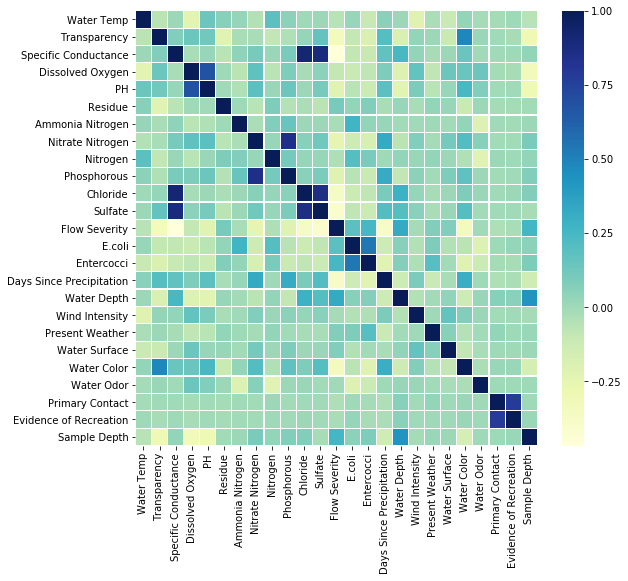

In [65]:
#chemicals_list.remove('E.coli Holding Time')
df2=df[chemicals_list]
corrmat = df2.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.show()

In [58]:
chemicals_list-'E.coli Holding Time'

TypeError: unsupported operand type(s) for -: 'list' and 'str'